In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

df = pd.read_csv(r"C:\Users\nmbarroso\Documents\wifi\sqllab_untitled_query_20200520T140851.csv")

df["tickets_by_mac"].fillna(0, inplace = True)

#df.head()

In [10]:
#cria uma coluna com valores binários para a existência de tickets

def binary_tickets (row):
    if row['tickets_by_mac'] == 0:
        return 0
    return 1

In [11]:
df['tickets_class'] = df.apply(lambda row: binary_tickets(row), axis=1)

In [12]:
#convert column from int to float

df['tickets_class'] = df['tickets_class'].astype(float)

In [13]:
df.tickets_class.value_counts()

0.0    1615997
1.0       8414
Name: tickets_class, dtype: int64

In [14]:
df.tickets_by_mac.value_counts()

0.0    1615997
1.0       7209
2.0        996
3.0        161
4.0         24
5.0         18
7.0          6
Name: tickets_by_mac, dtype: int64

In [15]:
df = df.drop(columns = ['chan24_10_nbrnws', 'chan24_10_sat', 'chan24_10_sigstr', 'chan24_11_nbrnws', 'chan24_11_sat', 'chan24_11_sigstr', 
         'chan24_1_nbrnws', 'chan24_1_sat', 'chan24_1_sigstr', 'chan24_2_nbrnws', 'chan24_2_sat', 'chan24_2_sigstr',
         'chan24_3_nbrnws', 'chan24_3_sat', 'chan24_3_sigstr', 'chan24_4_nbrnws', 'chan24_4_sat', 'chan24_4_sigstr', 
         'chan24_5_nbrnws', 'chan24_5_sat', 'chan24_5_sigstr', 'chan24_6_nbrnws', 'chan24_6_sat', 'chan24_6_sigstr', 
         'chan24_7_nbrnws', 'chan24_7_sat', 'chan24_7_sigstr', 'chan24_8_nbrnws', 'chan24_8_sat', 'chan24_8_sigstr',
         'chan24_9_nbrnws', 'chan24_9_sat', 'chan24_9_sigstr', 'mac', 'time', 'survey_made', 'day_part', 'tickets_by_mac'])

In [16]:
col_names = list(df.columns.values)
print(col_names)

['laninfo_chan24', 'laninfo_numdevs24', 'laninfo_rssi24', 'avgcpu_1m', 'avgcpu_5m', 'avgcpu_15m', 'uptime', 'freememperc', 'cpuloadperc', 'count_reboots24', 'count_reboots48', 'count_reboots72', 'count_reboots168', 'tickets_class']


In [8]:
#sns.pairplot(df);

In [9]:
#sns.scatterplot(x='uptime', y='freememperc', data=df)

In [10]:
#sns.scatterplot(x='tickets_by_mac', y='count_reboots168', data=df)

In [17]:
print(df.dtypes)

laninfo_chan24       float64
laninfo_numdevs24    float64
laninfo_rssi24        object
avgcpu_1m            float64
avgcpu_5m            float64
avgcpu_15m           float64
uptime               float64
freememperc          float64
cpuloadperc          float64
count_reboots24      float64
count_reboots48      float64
count_reboots72      float64
count_reboots168     float64
tickets_class        float64
dtype: object


In [18]:
df.laninfo_rssi24.isnull().sum()

165351

In [19]:
from ast import literal_eval

def apLitEval(x):
    """
    Function to "clean up" bracketed strings and convert them into float arrays
    """
    try:
        return literal_eval(x)
    except:
        return np.nan


In [20]:
df['test'] = df['laninfo_rssi24'].apply(apLitEval)

In [22]:
df['laninfo_rssi24'] = df['test'].apply(np.nanmean)

In [23]:
df = df.drop(columns = ['test'])

In [24]:
print(df.dtypes)

laninfo_chan24       float64
laninfo_numdevs24    float64
laninfo_rssi24       float64
avgcpu_1m            float64
avgcpu_5m            float64
avgcpu_15m           float64
uptime               float64
freememperc          float64
cpuloadperc          float64
count_reboots24      float64
count_reboots48      float64
count_reboots72      float64
count_reboots168     float64
tickets_class        float64
dtype: object


In [25]:
print(df.columns[df.isnull().any()])

Index(['laninfo_chan24', 'laninfo_numdevs24', 'laninfo_rssi24', 'avgcpu_1m',
       'avgcpu_5m', 'avgcpu_15m', 'uptime', 'freememperc', 'cpuloadperc',
       'count_reboots24', 'count_reboots48', 'count_reboots72',
       'count_reboots168'],
      dtype='object')


In [26]:
len(df)

1624411

In [27]:
df = df.dropna()
len(df)

163069

In [28]:
def results(test, pred):
    # Checking accuracy
    acc_score = accuracy_score(test, pred)
    print("Accuracy score: ", acc_score)

    # f1 score
    f_score = f1_score(test, pred)
    print("f1 score: ", f_score)

    #recall score
    r_score = recall_score(test, pred)
    print("Recall score: ", r_score)

    #precision score
    p_score = precision_score(test, pred)
    print("Precision score: ", p_score)
    

In [29]:
#Separate input features and target
y = df.tickets_class
X = df.drop('tickets_class', axis = 1)

#Setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [30]:
X = pd.concat([X_train, y_train], axis = 1)

no_tickets = X[X.tickets_class == 0]
tickets = X[X.tickets_class == 1]

In [31]:
# upsample minority
tickets_upsampled = resample(tickets, replace=True, n_samples=len(no_tickets), random_state=27)

# combine majority and upsampled minority
upsampled = pd.concat([no_tickets, tickets_upsampled])

upsampled.tickets_class.value_counts()

1.0    120291
0.0    120291
Name: tickets_class, dtype: int64

In [32]:
#Para upsample

y_train = upsampled.tickets_class
X_train = upsampled.drop('tickets_class', axis = 1)

In [33]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

print("Upsample results \n")

results(y_test, lr_pred)

Upsample results 

Accuracy score:  0.016483516483516484
f1 score:  0.032432432432432434
Recall score:  1.0
Precision score:  0.016483516483516484


In [34]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,0,40096
1,0,672


In [35]:
# train model
rfc = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print("Upsample results\n")

results(y_test, rfc_pred)

Upsample results

Accuracy score:  0.9837372448979592
f1 score:  0.032116788321167884
Recall score:  0.01636904761904762
Precision score:  0.8461538461538461


In [36]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,40094,2
1,661,11


In [37]:
#Separate input features and target
y = df.tickets_class
X = df.drop('tickets_class', axis = 1)

#Setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [38]:
X = pd.concat([X_train, y_train], axis = 1)

no_tickets = X[X.tickets_class == 0]
tickets = X[X.tickets_class == 1]

In [39]:
# downsample majority
no_tickets_downsampled = resample(no_tickets,
                                replace = False, # sample without replacement
                                n_samples = len(tickets), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_tickets_downsampled, tickets])

# checking counts
downsampled.tickets_class.value_counts()

1.0    2010
0.0    2010
Name: tickets_class, dtype: int64

In [40]:
#Para downsample

y_train = downsampled.tickets_class
X_train = downsampled.drop('tickets_class', axis=1)

In [41]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

print("Downsample results \n")

results(y_test, lr_pred)

Downsample results 

Accuracy score:  0.016483516483516484
f1 score:  0.032432432432432434
Recall score:  1.0
Precision score:  0.016483516483516484


In [42]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,0,40096
1,0,672


In [43]:
# train model
rfc = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print("Downsample results\n")

results(y_test, rfc_pred)

Downsample results

Accuracy score:  0.6438137755102041
f1 score:  0.06031191354429561
Recall score:  0.6934523809523809
Precision score:  0.03152696028685475


In [44]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,25781,14315
1,206,466


In [45]:
#Separate input features and target
y = df.tickets_class
X = df.drop('tickets_class', axis = 1)

#Setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [46]:
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [47]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

lr_pred = smote.predict(X_test)

print("SMOTE results\n")

results(y_test, lr_pred)

SMOTE results

Accuracy score:  0.016483516483516484
f1 score:  0.032432432432432434
Recall score:  1.0
Precision score:  0.016483516483516484


In [49]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,0,40096
1,0,672


In [50]:
# train model
rfc = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print("SMOTE results\n")

results(y_test, rfc_pred)

SMOTE results

Accuracy score:  0.9834428963893249
f1 score:  0.034334763948497854
Recall score:  0.017857142857142856
Precision score:  0.4444444444444444


In [51]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,40081,15
1,660,12


In [52]:
train_rf_predictions = rfc.predict(X_train)
train_rf_probs = rfc.predict_proba(X_train)[:, 1]

rf_probs = rfc.predict_proba(X_test)[:, 1]

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score( y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.02 Train: 1.0
Precision Baseline: 0.02 Test: 0.44 Train: 1.0
Roc Baseline: 0.5 Test: 0.71 Train: 1.0


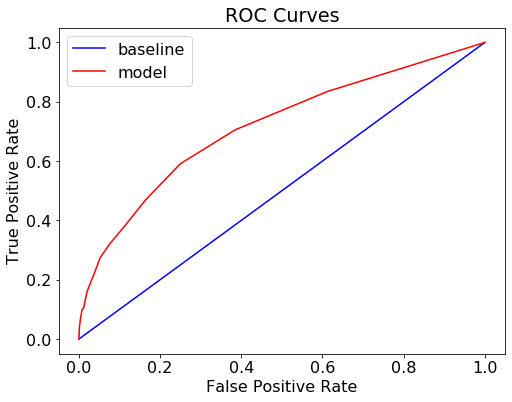

In [54]:
evaluate_model(rfc_pred, rf_probs, train_rf_predictions, train_rf_probs)